In [2]:
#importing all libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as py
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout,Bidirectional, GRU
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import plot_model
import warnings
import time
import psutil
import os
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model
from tensorflow.keras.layers import (
    Input, GRU, LSTM, Bidirectional, Dense, Dropout,
    Conv1D, MaxPooling1D, Flatten, Concatenate,
    LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D)
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix # For model performance reporting
from tensorflow.keras.models import Sequential # To build neural network layer by layer
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Dense, Dropout,GlobalMaxPooling1D
from keras.layers import LSTM, Dense, Dropout, Bidirectional, Flatten, Activation
from sklearn.metrics import roc_curve
warnings.filterwarnings('ignore')

2026-02-24 06:59:52.599840: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1771916392.832515      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1771916392.895104      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1771916393.395574      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771916393.395618      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771916393.395624      55 computation_placer.cc:177] computation placer alr

In [4]:
#laoding dataset into dataframe
schema= pd.read_csv('/kaggle/input/azure-dataset-schema/schema.csv')
dataframe = pd.read_csv('/kaggle/input/azure-dataset/vm_cpu_readings-file-46-of-125.csv')

In [5]:
dataframe

,942900,BtPapuek46P3tLrrm71+kgrq20fBrjP84eA/GD1jPJvOZlGCclQ0CCK5R/ZlAoZq,5.940973,28.417527,13.299823
0,942900,El18FXXVwMEqmv/duNvkLMzpIbkREZi/gGx5Z2Y6JZx0Sx...,9.898636,13.862328,11.797383
1,942900,F9Y0qkEAWmfV+AgFVwVOE1WABlQrvybHwH1wRV23cWNOhL...,0.515477,1.809250,1.170547
2,942900,APe6iT0MAh/Vp5HJhThqNk1TwpjHI6guzzbzdnJm85Nmuo...,3.133321,5.609906,4.234634
3,942900,A9hB1D06danA7hvf9Ebk5bhEfMXYRETN3ECU75NbURm1sD...,3.905818,8.763921,5.246970
4,942900,BvQgl84N7If8Rbj+vPjlnfC5OsEb8DvAKZD1AZbh7XE21D...,5.370761,6.879576,6.235792
...,...,...,...,...,...
9999994,963900,/Gu5w4jlkBcdAJmFgDUVmrcFOcZHKALl4JDIBzFVFnA1Tc...,23.986350,85.642950,52.643262
9999995,963900,0phiUKfRCIMiJS6XeWyyUJAgLCqElbbLmCxpFQbCZqBI0B...,0.430659,15.970120,3.536432
9999996,963900,+NaiFnzlqWPx7I2+HujV2Gio/K3KVmul1AY57tIa2GCupt...,0.501282,0.599877,0.557235
9999997,963900,/Xx2uT1Hel4rSARmhC4I0KHJhkt6I2gY90mXRffhF+AX6x...,0.243812,47.376178,31.329593


In [6]:
schema=schema[-5:].reset_index()
schema

,index,filepattern,field_number,content,format
0,16,vm_cpu_readings/vm_cpu_readings-file-*-of-125....,1,timestamp,INTEGER
1,17,vm_cpu_readings/vm_cpu_readings-file-*-of-125....,2,vm id,STRING_HASH
2,18,vm_cpu_readings/vm_cpu_readings-file-*-of-125....,3,min cpu,DOUBLE
3,19,vm_cpu_readings/vm_cpu_readings-file-*-of-125....,4,max cpu,DOUBLE
4,20,vm_cpu_readings/vm_cpu_readings-file-*-of-125....,5,avg cpu,DOUBLE


In [7]:
df=pd.DataFrame(dataframe.values,columns=schema.content.to_list())
df

,timestamp,vm id,min cpu,max cpu,avg cpu
0,942900,El18FXXVwMEqmv/duNvkLMzpIbkREZi/gGx5Z2Y6JZx0Sx...,9.898636,13.862328,11.797383
1,942900,F9Y0qkEAWmfV+AgFVwVOE1WABlQrvybHwH1wRV23cWNOhL...,0.515477,1.80925,1.170547
2,942900,APe6iT0MAh/Vp5HJhThqNk1TwpjHI6guzzbzdnJm85Nmuo...,3.133321,5.609906,4.234634
3,942900,A9hB1D06danA7hvf9Ebk5bhEfMXYRETN3ECU75NbURm1sD...,3.905818,8.763921,5.24697
4,942900,BvQgl84N7If8Rbj+vPjlnfC5OsEb8DvAKZD1AZbh7XE21D...,5.370761,6.879576,6.235792
...,...,...,...,...,...
9999994,963900,/Gu5w4jlkBcdAJmFgDUVmrcFOcZHKALl4JDIBzFVFnA1Tc...,23.98635,85.64295,52.643262
9999995,963900,0phiUKfRCIMiJS6XeWyyUJAgLCqElbbLmCxpFQbCZqBI0B...,0.430659,15.97012,3.536432
9999996,963900,+NaiFnzlqWPx7I2+HujV2Gio/K3KVmul1AY57tIa2GCupt...,0.501282,0.599877,0.557235
9999997,963900,/Xx2uT1Hel4rSARmhC4I0KHJhkt6I2gY90mXRffhF+AX6x...,0.243812,47.376178,31.329593


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999999 entries, 0 to 9999998
Data columns (total 5 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   timestamp  object
 1   vm id      object
 2   min cpu    object
 3   max cpu    object
 4   avg cpu    object
dtypes: object(5)
memory usage: 381.5+ MB


In [9]:
df['min cpu']=df['min cpu'].astype('float')
df['max cpu']=df['max cpu'].astype('float')
df['avg cpu']=df['avg cpu'].astype('float')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999999 entries, 0 to 9999998
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   timestamp  object 
 1   vm id      object 
 2   min cpu    float64
 3   max cpu    float64
 4   avg cpu    float64
dtypes: float64(3), object(2)
memory usage: 381.5+ MB


In [11]:
df.isna().sum()

timestamp    0
vm id        0
min cpu      0
max cpu      0
avg cpu      0
dtype: int64

In [12]:
df.describe()

,min cpu,max cpu,avg cpu
count,9.999999e+06,9.999999e+06,9.999999e+06
mean,4.633418e+00,1.432043e+01,7.754129e+00
std,1.056108e+01,2.037452e+01,1.353562e+01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.047760e-01,3.350376e+00,1.766367e+00
50%,2.215879e+00,6.632010e+00,3.745505e+00
75%,3.994927e+00,1.416819e+01,6.814319e+00
max,1.000000e+02,1.000000e+02,1.000000e+02


# EDA

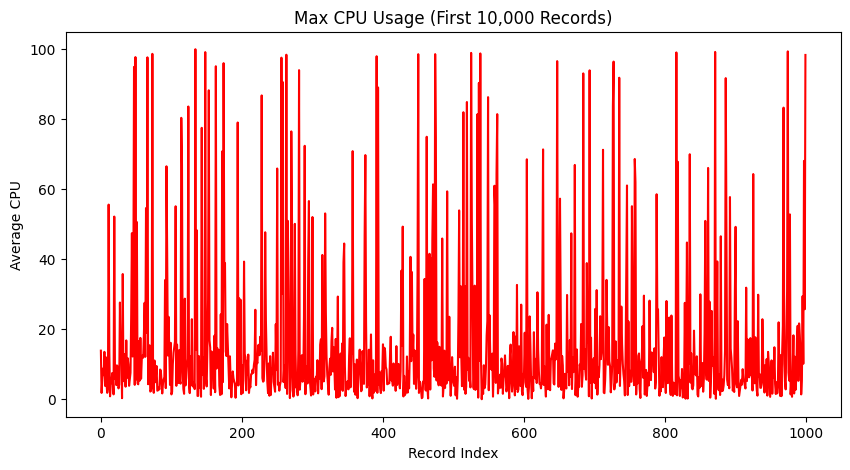

In [42]:
limit = 1000

plt.figure(figsize=(10,5))
plt.plot(df['max cpu'].iloc[:limit], color='red')

plt.title("Max CPU Usage (First 10,000 Records)")
plt.xlabel("Record Index")
plt.ylabel("Average CPU")
plt.show()

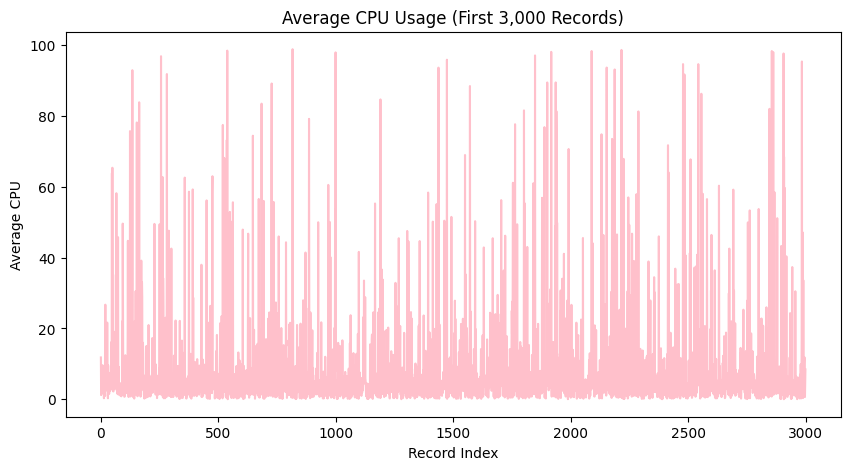

In [46]:
limit = 3000

plt.figure(figsize=(10,5))
plt.plot(df['avg cpu'].iloc[:limit], color='pink')

plt.title("Average CPU Usage (First 3,000 Records)")
plt.xlabel("Record Index")
plt.ylabel("Average CPU")
plt.show()

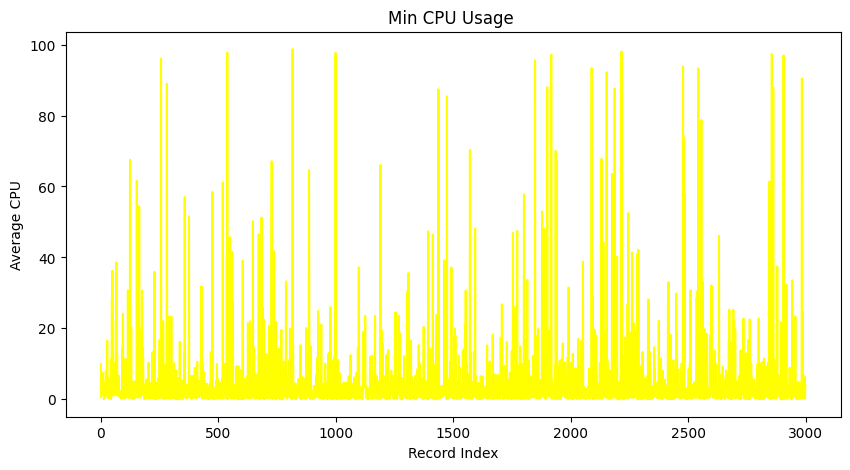

In [44]:
limit = 3000

plt.figure(figsize=(10,5))
plt.plot(df['min cpu'].iloc[:limit], color='yellow')

plt.title("Min CPU Usage ")
plt.xlabel("Record Index")
plt.ylabel("Average CPU")
plt.show()

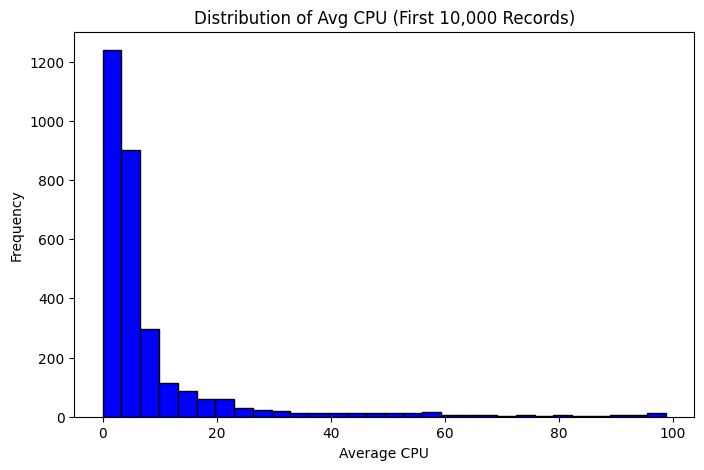

In [27]:
plt.figure(figsize=(8,5))
plt.hist(df['avg cpu'].iloc[:limit],
         bins=30,
         color='blue',
         edgecolor='black')

plt.title("Distribution of Avg CPU (First 10,000 Records)")
plt.xlabel("Average CPU")
plt.ylabel("Frequency")
plt.show()

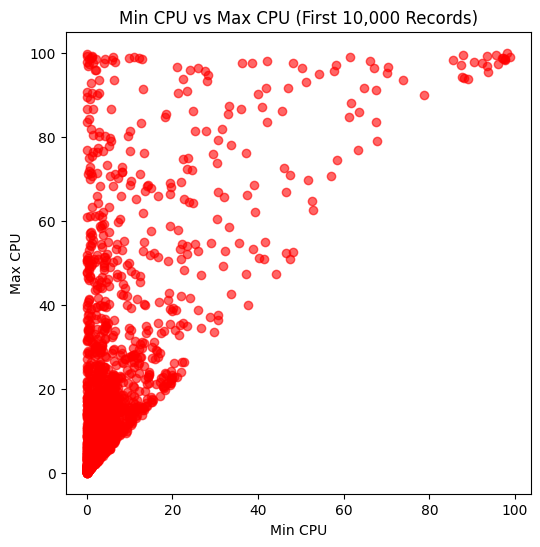

In [28]:
plt.figure(figsize=(6,6))
plt.scatter(df['min cpu'].iloc[:limit],
            df['max cpu'].iloc[:limit],
            color='red',
            alpha=0.6)

plt.title("Min CPU vs Max CPU (First 10,000 Records)")
plt.xlabel("Min CPU")
plt.ylabel("Max CPU")
plt.show()

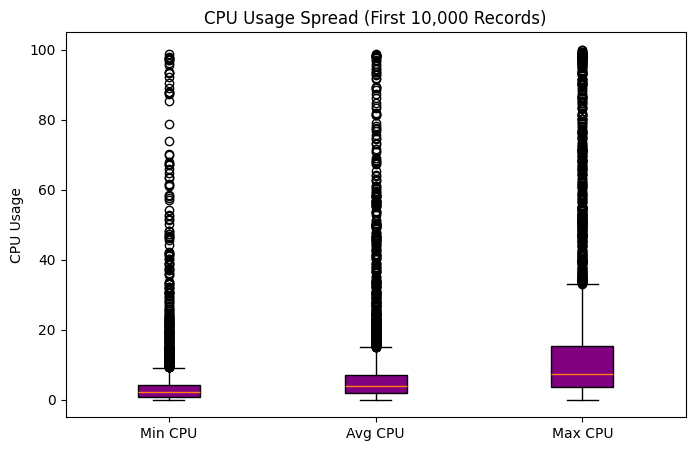

In [29]:
plt.figure(figsize=(8,5))
plt.boxplot([df['min cpu'].iloc[:limit],
             df['avg cpu'].iloc[:limit],
             df['max cpu'].iloc[:limit]],
            labels=['Min CPU','Avg CPU','Max CPU'],
            patch_artist=True,
            boxprops=dict(facecolor='purple'))

plt.title("CPU Usage Spread (First 10,000 Records)")
plt.ylabel("CPU Usage")
plt.show()

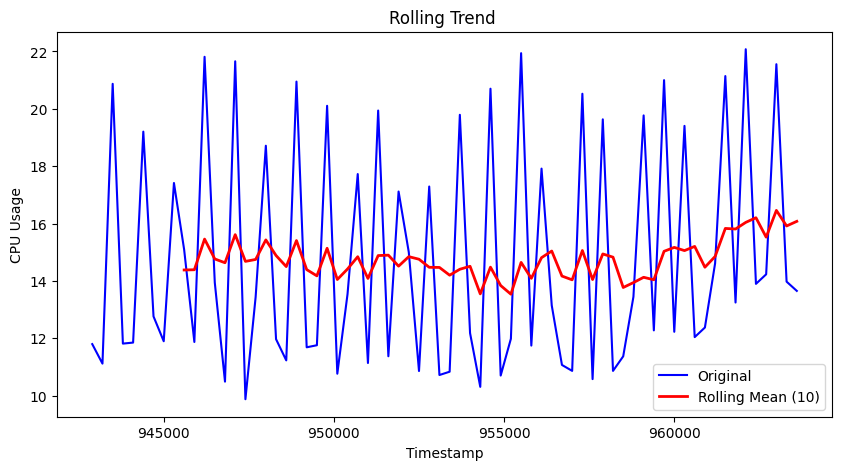

In [37]:
limit = 100000

vm_id = df['vm id'].iloc[0]

vm_data = df[df['vm id'] == vm_id].sort_values('timestamp')

plt.figure(figsize=(10,5))
plt.plot(vm_data['timestamp'].iloc[:limit],
         vm_data['avg cpu'].iloc[:limit],
         color='blue')

plt.plot(vm_data['timestamp'].iloc[:limit],
         vm_data['avg cpu'].iloc[:limit].rolling(10).mean(),
         color='red',
         linewidth=2)

plt.title(f"Rolling Trend ")
plt.xlabel("Timestamp")
plt.ylabel("CPU Usage")
plt.legend(["Original", "Rolling Mean (10)"])
plt.show()

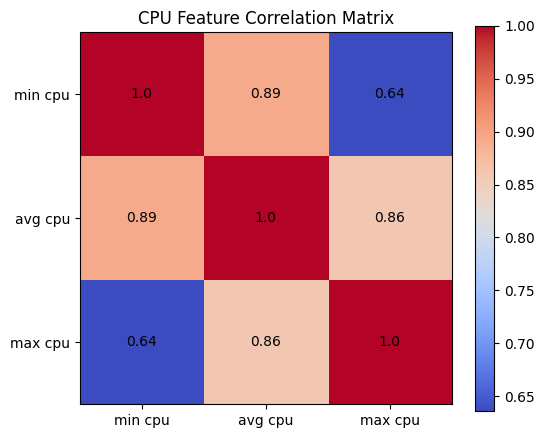

In [20]:
corr = df[['min cpu','avg cpu','max cpu']].corr()

plt.figure(figsize=(6,5))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)
plt.title("CPU Feature Correlation Matrix")

for i in range(len(corr)):
    for j in range(len(corr)):
        plt.text(j, i, round(corr.iloc[i, j],2),
                 ha='center', va='center', color='black')

plt.show()

# DATA PREPROCESSING

In [71]:
idle_threshold = 5.0
    # IDLE_THRESHOLD = 5.0  # CPU % threshold for IDLE classification
MAX_VMS = 200  # More VMs for better representation
SAMPLE_FRAC = 0.5  # Use 50% of data
lookback = 12  # 1 hour of history (12 × 5min)
prediction_horizon = 12  # FORECAST 1 HOUR AHEAD (12 × 5min = 60 min)
EPOCHS = 25
BATCH_SIZE = 64
df['label'] = (df['avg cpu'] >= idle_threshold).astype(int)

idle_count = (df['label'] == 0).sum()
active_count = (df['label'] == 1).sum()

print(f"\n{'='*70}")
print(f"IDLE vs ACTIVE CLASSIFICATION (Threshold: {idle_threshold}%)")
print(f"{'='*70}")
print(f"  IDLE (CPU < {idle_threshold}%): {idle_count:,} ({idle_count/len(df)*100:.1f}%)")
print(f"  ACTIVE (CPU >= {idle_threshold}%): {active_count:,} ({active_count/len(df)*100:.1f}%)")


IDLE vs ACTIVE CLASSIFICATION (Threshold: 5.0%)
  IDLE (CPU < 5.0%): 6,257,309 (62.6%)
  ACTIVE (CPU >= 5.0%): 3,742,690 (37.4%)


In [72]:
df['vm id'].value_counts()

vm id
3MVl91/nq6xCg4w0luOfix4FEor59JGfLQ9duzlLsBlmMyo7OFuOBfma8qjmoS9y    70
CGX6jYO3TYd73KId42N7E9QK6k8MlT897UFmAdzVvm6H/yod96Ktemo34++N/Srk    70
FHMYRJqdR6gF76Vtx/mewpA/6UiRFzUoKxG2arEZoiCG2csw1ZwbPgDgjBdqDXK+    70
EKDON07g3+0zximu3EHqRbGILtqeKvcS2HdKTHPLt/HjjBYBKIESRpLWOymvynzg    70
EaNSJKxrjfPXlDgf/1XCWAz3CJIN8VeEnWU818Xj/Jy5wyAUcWwOu+rctj6n2LP8    70
                                                                    ..
Uy+3zAcwF4SnCP+5+YcGQAjiQmfeI9EuzTpxukyBrBgvGALWoEGsWULn6n0R0x16     1
aGYT3uqnPMMix+xs9aeyDU5x2P+cujI0HD5F/rKEPal70quvdYwzO639S20Pc33r     1
cnvwsnpzqy1Jk4RMQb1fUeCN20LYWR8NiXhhPttxuNg2v2j97aL0pVmzdjQnFvVj     1
YnoVGAiNKzUSipcyhC+7krZLggMeISnrbVrdHHWgFLaGS62ZZErtMGsJUUfJI3YX     1
udKYXP0HllEa4iBiOVlGd4gi2zeVRzgS5WKe3SSMvv7ozghOdHqsKOg6DdVXcjk4     1
Name: count, Length: 156031, dtype: int64

In [73]:
print(f"\n{'='*70}")
print("CREATING SEQUENCES")
print(f"{'='*70}")
print(f"  Lookback: {lookback} timesteps ({lookback*5} minutes)")
print(f"  Prediction horizon: {prediction_horizon} timestep(s) ({prediction_horizon*5} min)")

X_all, y_all, vm_ids_all = [], [], []

for vm_id in tqdm(df['vm id'].unique()[:5000],desc='processing...'):
    vm_data = df[df['vm id'] == vm_id].sort_values('timestamp')

    if len(vm_data) < lookback + prediction_horizon:
        continue

    # Features: avg_cpu, max_cpu, min_cpu (normalized to 0-1)
    features = vm_data[['avg cpu', 'max cpu', 'min cpu']]
    labels = vm_data['label'].values

    for i in range(len(features) - lookback - prediction_horizon + 1):
        X_seq = features[i:i+lookback]
        # Predict label at future timestep
        y_label = labels[i+lookback+prediction_horizon-1]

        X_all.append(X_seq)
        y_all.append(y_label)
        vm_ids_all.append(vm_id)

X = np.array(X_all)
y = np.array(y_all)
vm_ids = np.array(vm_ids_all)

print(f"\n[OK] Created {len(X):,} sequences")
print(f"  Input shape: {X.shape}")
print(f"  Label distribution:")
print(f"    IDLE: {np.sum(y == 0):,} ({np.sum(y == 0)/len(y)*100:.1f}%)")
print(f"    ACTIVE: {np.sum(y == 1):,} ({np.sum(y == 1)/len(y)*100:.1f}%)")


CREATING SEQUENCES
  Lookback: 12 timesteps (60 minutes)
  Prediction horizon: 12 timestep(s) (60 min)


processing...: 100%|██████████| 5000/5000 [1:00:53<00:00,  1.37it/s]



[OK] Created 227,293 sequences
  Input shape: (227293, 12, 3)
  Label distribution:
    IDLE: 141,765 (62.4%)
    ACTIVE: 85,528 (37.6%)


In [74]:
test_size=int(len(X) * 0.2)
X_train,X_test=X[:test_size],X[test_size:]
y_train,y_test=y[:test_size],y[test_size:]

In [75]:
from sklearn.preprocessing import MinMaxScaler

feature_scaler = MinMaxScaler(feature_range=(0,1))
target_scaler = MinMaxScaler(feature_range=(0,1))

n_samples, n_timesteps, n_features = X_train.shape

# Flatten
X_train_reshaped = X_train.reshape(-1, n_features)
X_test_reshaped  = X_test.reshape(-1, n_features)

# Fit only on train
feature_scaler.fit(X_train_reshaped)

# Transform
X_train_scaled = feature_scaler.transform(X_train_reshaped)
X_test_scaled  = feature_scaler.transform(X_test_reshaped)

# Reshape back
X_train = X_train_scaled.reshape(n_samples, n_timesteps, n_features)
X_test  = X_test_scaled.reshape(X_test.shape[0], n_timesteps, n_features)